<a href="https://colab.research.google.com/github/laurahallaman1/final_project/blob/master/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:


import pandas as pd
import re
from collections import Counter

# read data
reviews_df = pd.read_csv("https://raw.githubusercontent.com/laurahallaman1/final_project/master/CSVs/Reviewer_Combined_Amazon_Consumer_Reviews.csv")
# create the label
reviews_df["is_bad_rating"] = reviews_df["rating"].apply(lambda x: 1 if x < 4 else 0)
# reviews_df["reviewer"] = reviews_df["reviewer"](int(float('Bot')))
# select only relevant columns
reviews_df = reviews_df[["text", "is_bad_rating","reviewer"]]
reviews_df.head(10)



,text,is_bad_rating,reviewer
0,"Serves the purpose for which it was bought, ; ...",1,Bot
1,"Serves the purpose for which it was bought, ; ...",1,Bot
2,"Serves the purpose for which it was bought, ; ...",1,Bot
3,This tablet is small enough to pack but the sc...,0,Bot
4,This tablet is small enough to pack but the sc...,0,Bot
5,This device is a good if you are looking for a...,1,Bot
6,This device is a good if you are looking for a...,1,Bot
7,This device is a good if you are looking for a...,1,Bot
8,This device is a good if you are looking for a...,1,Bot
9,Using for Pandora in an office setting. Set up...,0,Bot


In [0]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
#     text = Counter(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["text"].apply(lambda x: clean_text(x))
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review_clean"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review_clean"].apply(lambda x: len(x.split(" ")))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
reviews_df.head(20)

,text,is_bad_rating,reviewer,review_clean,nb_chars,nb_words
0,"Serves the purpose for which it was bought, ; ...",1,Bot,serves purpose bought i.e facebook,34,5
1,"Serves the purpose for which it was bought, ; ...",1,Bot,serves purpose bought i.e facebook,34,5
2,"Serves the purpose for which it was bought, ; ...",1,Bot,serves purpose bought i.e facebook,34,5
3,This tablet is small enough to pack but the sc...,0,Bot,tablet small enough pack screen perfect size w...,76,11
4,This tablet is small enough to pack but the sc...,0,Bot,tablet small enough pack screen perfect size w...,76,11
5,This device is a good if you are looking for a...,1,Bot,device good looking starter tablet young indiv...,51,7
6,This device is a good if you are looking for a...,1,Bot,device good looking starter tablet young indiv...,51,7
7,This device is a good if you are looking for a...,1,Bot,device good looking starter tablet young indiv...,51,7
8,This device is a good if you are looking for a...,1,Bot,device good looking starter tablet young indiv...,51,7
9,Using for Pandora in an office setting. Set up...,0,Bot,using pandora office setting set older system ...,72,11


In [0]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["text"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
reviews_df.head(50)

,text,is_bad_rating,reviewer,review_clean,nb_chars,nb_words,neg,neu,pos,compound
0,"Serves the purpose for which it was bought, ; ...",1,Bot,serves purpose bought i.e facebook,34,5,0.000,1.000,0.000,0.0000
1,"Serves the purpose for which it was bought, ; ...",1,Bot,serves purpose bought i.e facebook,34,5,0.000,1.000,0.000,0.0000
2,"Serves the purpose for which it was bought, ; ...",1,Bot,serves purpose bought i.e facebook,34,5,0.000,1.000,0.000,0.0000
3,This tablet is small enough to pack but the sc...,0,Bot,tablet small enough pack screen perfect size w...,76,11,0.000,0.806,0.194,0.7227
4,This tablet is small enough to pack but the sc...,0,Bot,tablet small enough pack screen perfect size w...,76,11,0.000,0.806,0.194,0.7227
5,This device is a good if you are looking for a...,1,Bot,device good looking starter tablet young indiv...,51,7,0.000,0.818,0.182,0.4404
6,This device is a good if you are looking for a...,1,Bot,device good looking starter tablet young indiv...,51,7,0.000,0.818,0.182,0.4404
7,This device is a good if you are looking for a...,1,Bot,device good looking starter tablet young indiv...,51,7,0.000,0.818,0.182,0.4404
8,This device is a good if you are looking for a...,1,Bot,device good looking starter tablet young indiv...,51,7,0.000,0.818,0.182,0.4404
9,Using for Pandora in an office setting. Set up...,0,Bot,using pandora office setting set older system ...,72,11,0.000,0.796,0.204,0.6249


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

Data=pd.read_csv('Vaders.CSV')



,text,is_bad_rating,reviewer,review_clean,nb_chars,nb_words,neg,neu,pos,compound
0,"Serves the purpose for which it was bought, ; ...",1,Bot,serves purpose bought i.e facebook,34,5,0.0,1.000,0.000,0.0000
1,"Serves the purpose for which it was bought, ; ...",1,Bot,serves purpose bought i.e facebook,34,5,0.0,1.000,0.000,0.0000
2,"Serves the purpose for which it was bought, ; ...",1,Bot,serves purpose bought i.e facebook,34,5,0.0,1.000,0.000,0.0000
3,This tablet is small enough to pack but the sc...,0,Bot,tablet small enough pack screen perfect size w...,76,11,0.0,0.806,0.194,0.7227
4,This tablet is small enough to pack but the sc...,0,Bot,tablet small enough pack screen perfect size w...,76,11,0.0,0.806,0.194,0.7227
5,This device is a good if you are looking for a...,1,Bot,device good looking starter tablet young indiv...,51,7,0.0,0.818,0.182,0.4404
6,This device is a good if you are looking for a...,1,Bot,device good looking starter tablet young indiv...,51,7,0.0,0.818,0.182,0.4404
7,This device is a good if you are looking for a...,1,Bot,device good looking starter tablet young indiv...,51,7,0.0,0.818,0.182,0.4404
8,This device is a good if you are looking for a...,1,Bot,device good looking starter tablet young indiv...,51,7,0.0,0.818,0.182,0.4404
9,Using for Pandora in an office setting. Set up...,0,Bot,using pandora office setting set older system ...,72,11,0.0,0.796,0.204,0.6249


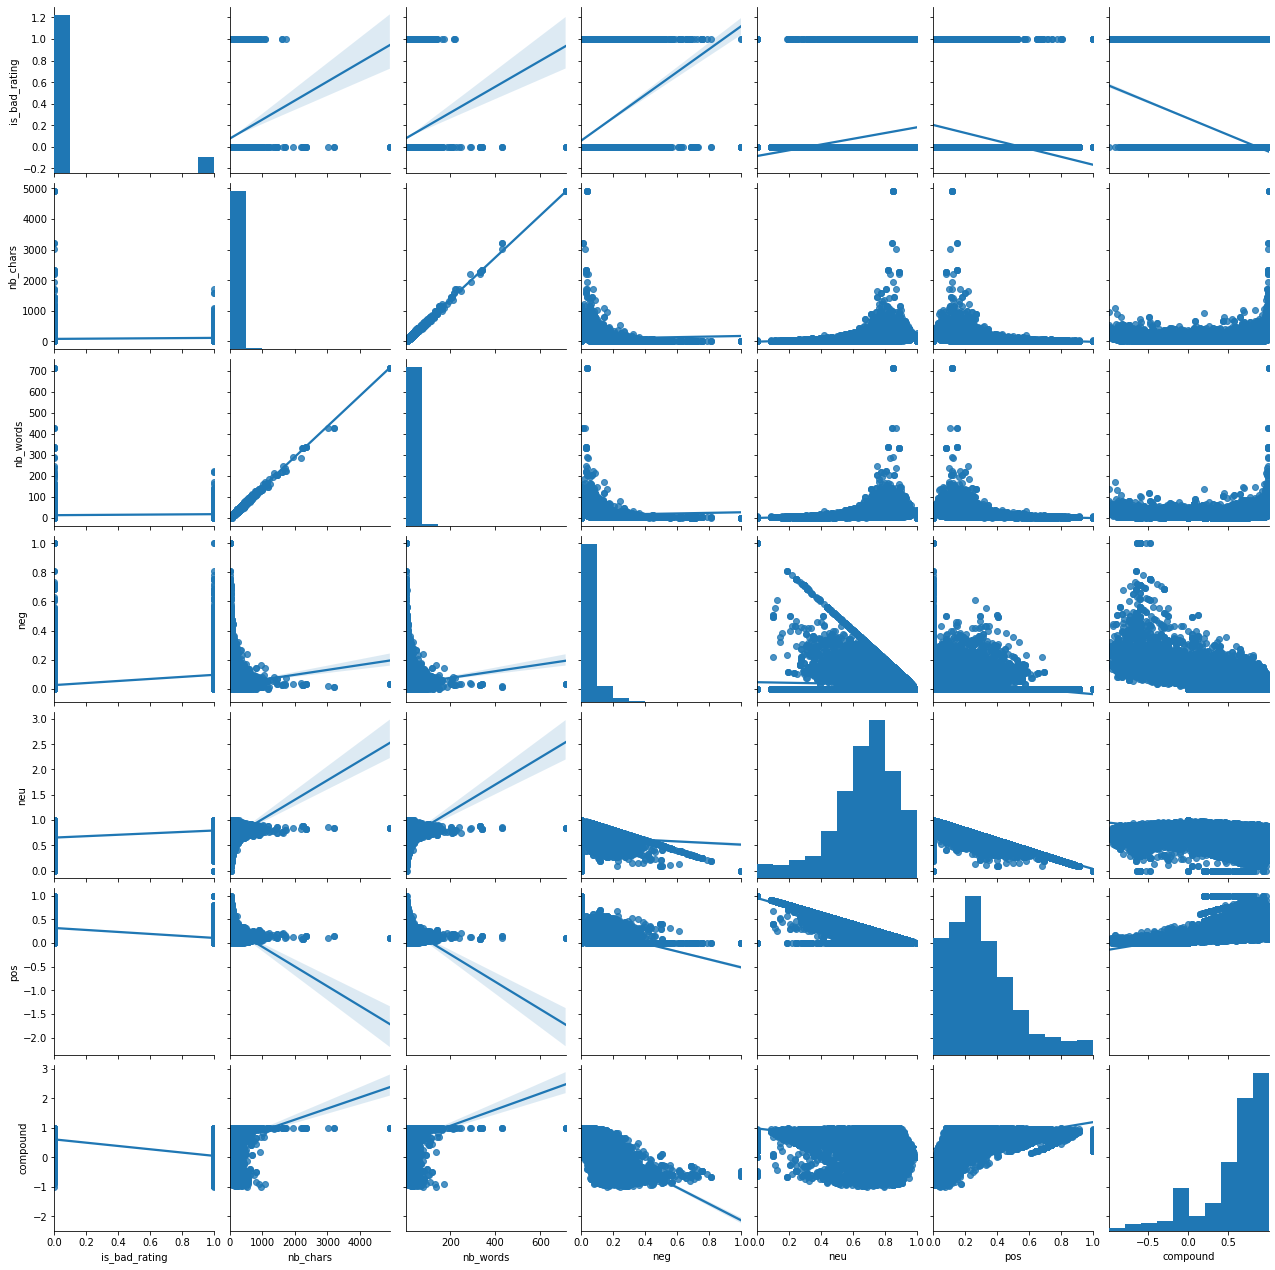

In [0]:
sns.pairplot(Data, kind="reg")
plt.show()


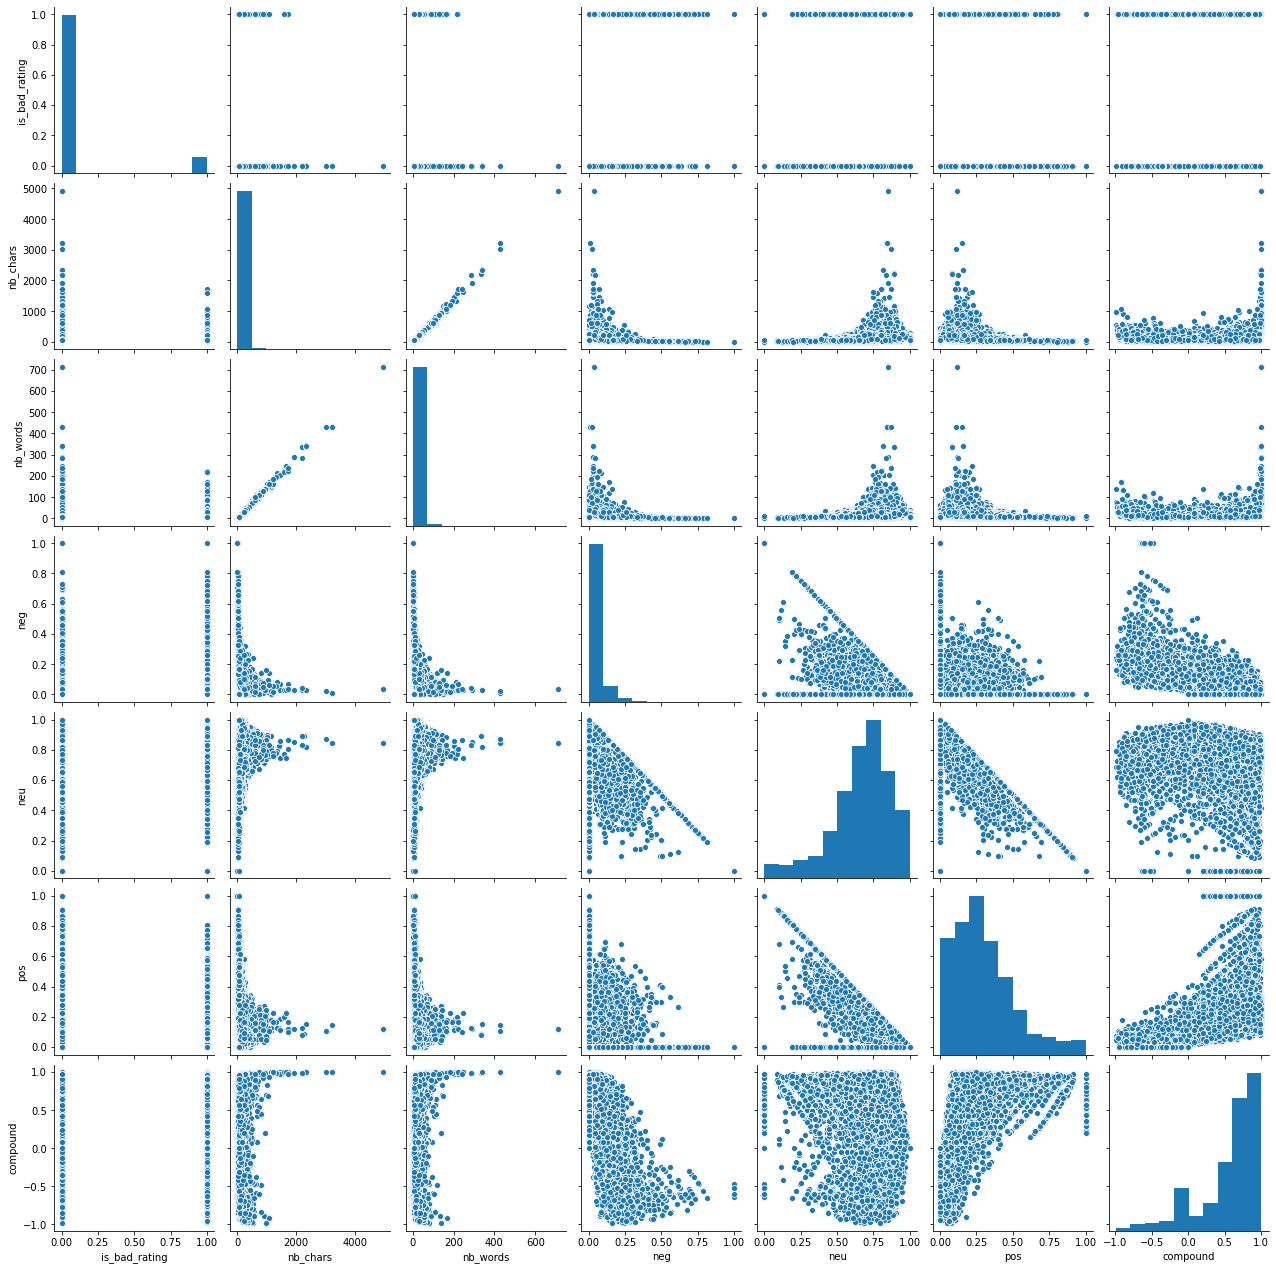

In [0]:
# without regression
sns.pairplot(Data, kind="scatter")
plt.show()

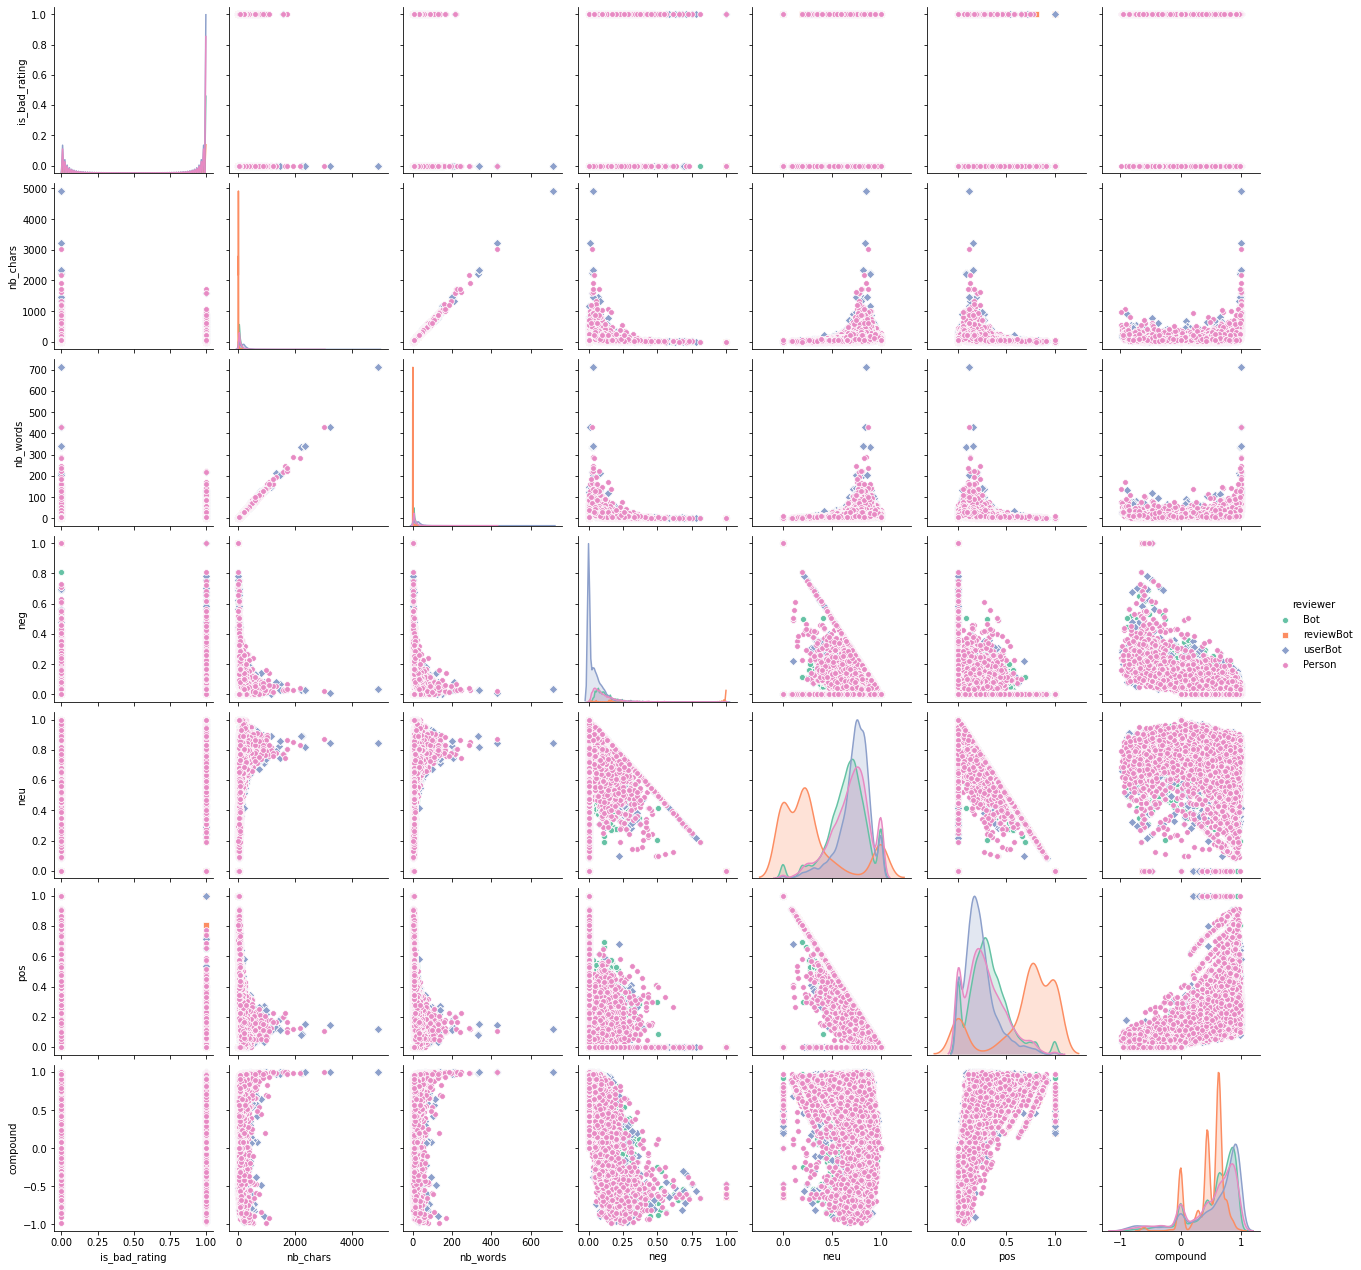

In [0]:
sns.pairplot(Data, kind="scatter", hue="reviewer", markers=["o", "s", "D", "8"], palette="Set2")
plt.show()


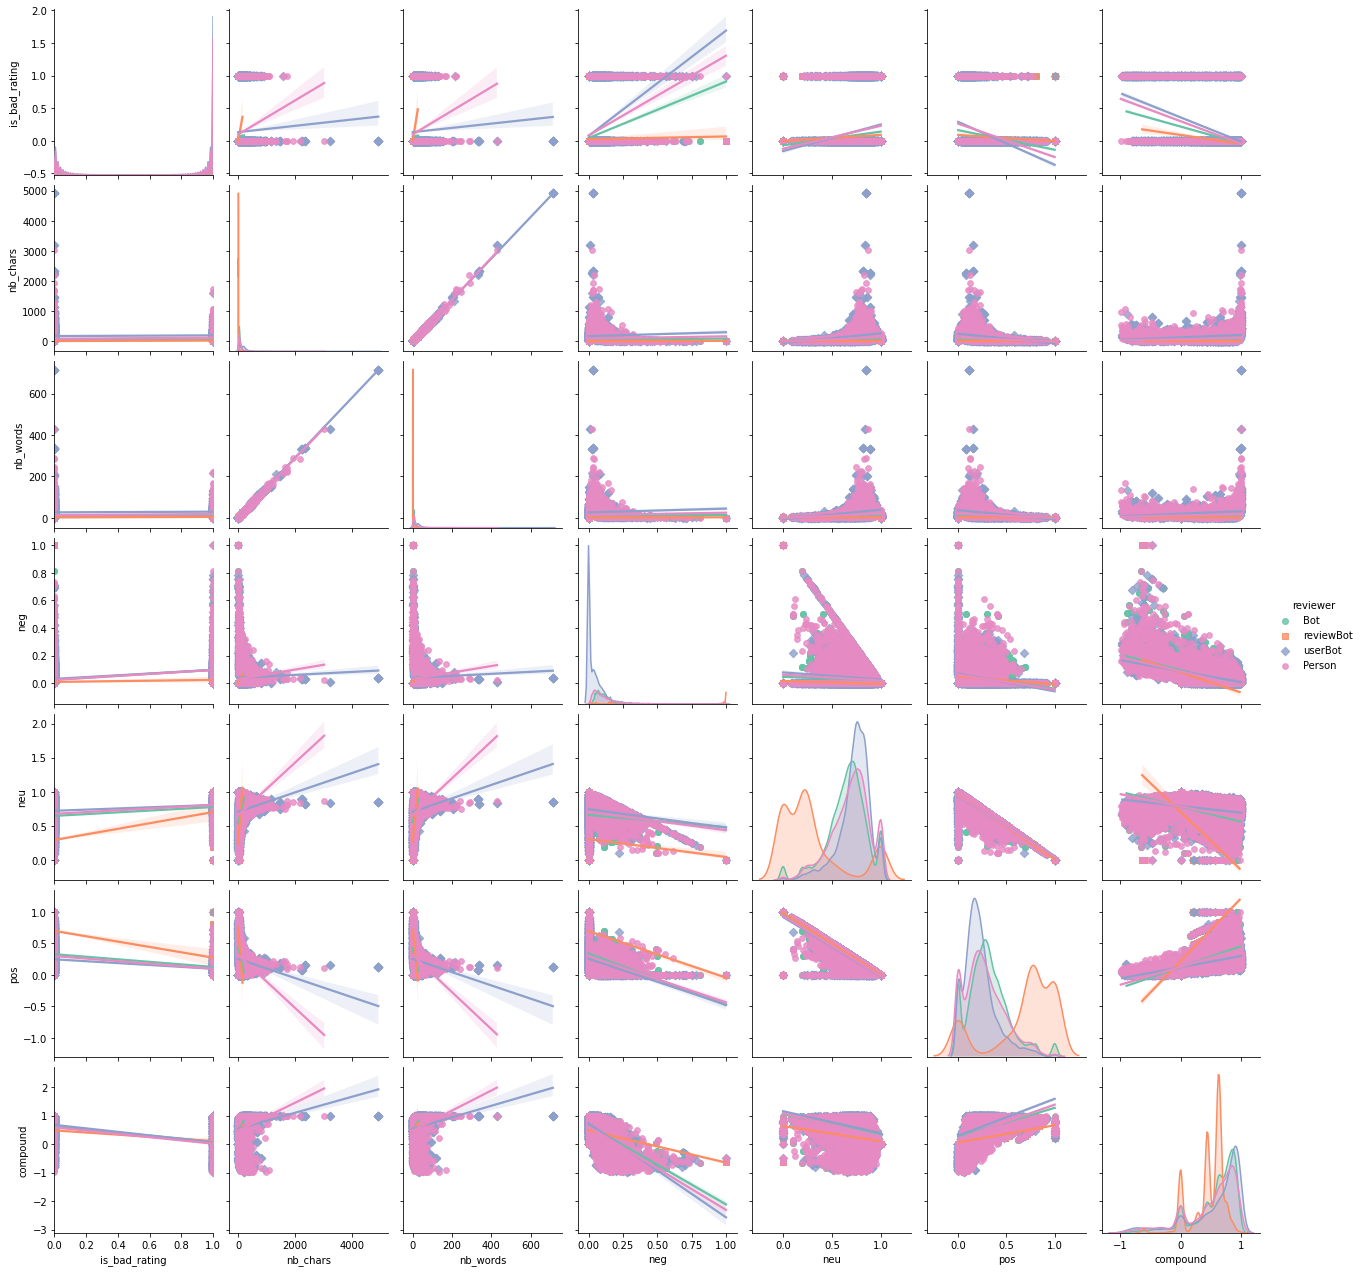

In [0]:
sns.pairplot(Data, kind="reg", hue="reviewer", markers=["o", "s", "D", "8"], palette="Set2")
plt.show()

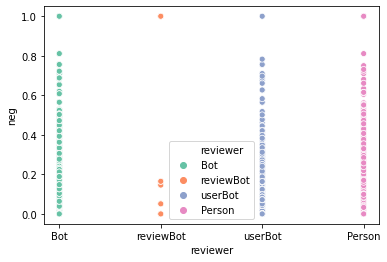

In [0]:
ax = sns.scatterplot(x="reviewer", y="neg", hue="reviewer", palette ="Set2",
                     data=Data)

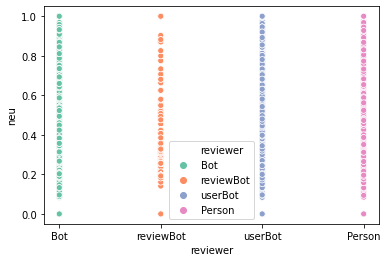

In [0]:
ax = sns.scatterplot(x="reviewer", y="neu", hue="reviewer", palette ="Set2",
                     data=Data)

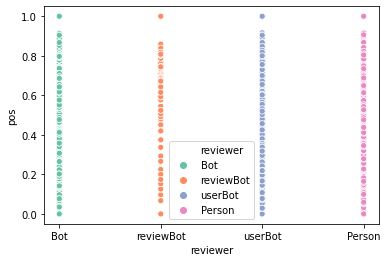

In [0]:
ax = sns.scatterplot(x="reviewer", y="pos", hue="reviewer", palette ="Set2",
                     data=Data)

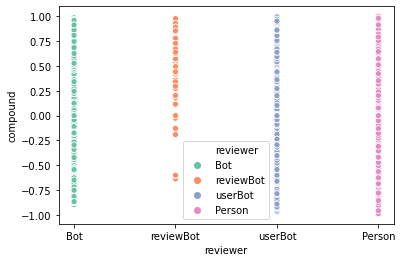

In [0]:
ax = sns.scatterplot(x="reviewer", y="compound", hue="reviewer", palette ="Set2",
                     data=Data)

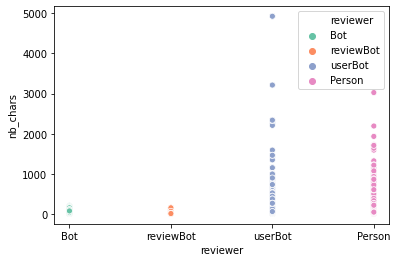

In [0]:
ax = sns.scatterplot(x="reviewer", y="nb_chars", hue="reviewer", palette ="Set2",
                     data=Data)

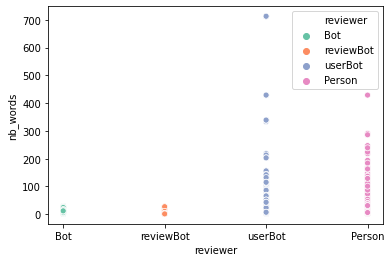

In [0]:
ax = sns.scatterplot(x="reviewer", y="nb_words", hue="reviewer", palette ="Set2",
                     data=Data)

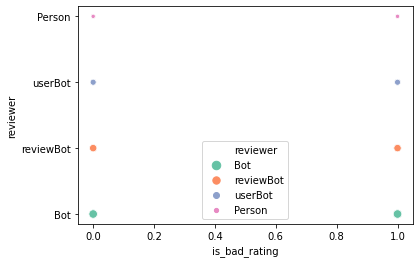

In [0]:
ax = sns.scatterplot(x="is_bad_rating", y="reviewer", hue="reviewer", size="reviewer", palette ="Set2",
                     data=Data)

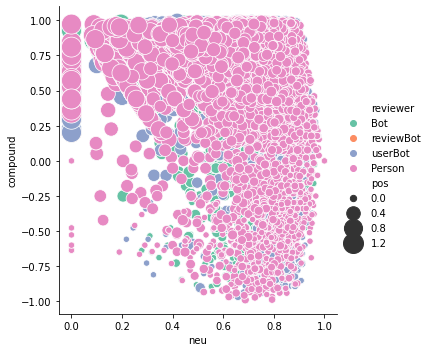

In [83]:
sns.relplot(x="neu", y="compound", hue="reviewer", size="pos", sizes=(40, 400), palette="Set2",
            data=Data)